# Tarea 1 INF-396

**Pregunta 4 (40%)**

En esta pregunta tendrás que modelar la distribución binomial utilizando la simulación.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [8]:
# Programe la función simulate_heads que simula el lanzamiento de n 
# monedas y cuenta el retorna el número de caras que aparecieron 
# en los n lanzamientos, para esto estudie y utilice la función 
# random.rand

np.random.seed(0)

def simulate_heads(n):
    ### su codigo aquí ###
    n_heads = 0
    for i in range(n):
        moneda = np.random.rand(1)
        if(moneda>=0.5):
            n_heads += 1
    return n_heads


In [9]:
# Programe la función prob_estimation que calcula la probabilidad
# de que aparezcan entre n1 (inclusive), n2 - 1 (inclusive) caras,
# en n lanzamientos, para esto simule k veces el experimento y luego
# calcule la probabilidad utilizando la proporcion de casos exitosos

def prob_estimation(n,n1,n2,k):
    ### su código aquí ###
    casosExitosos = 0
    for i in range(k):
        n_heads = simulate_heads(n)
        if(n_heads >= n1 and n_heads <= n2-1):
            casosExitosos += 1
    prob = float(casosExitosos/k)
    return prob


In [10]:
# Esta función estima la probabilidad real, aproximando la distribución
# binomial con la distribución normal, lo que se puede hacer bajo 
# ciertas circunstancias para mas información puede revisar aquí: 
# revisar aquí: http://scipp.ucsc.edu/~haber/ph116C/NormalApprox.pdf
import math

def calc_prob(n,n1,n2):
    ### Normal approximation ###
    n=float(n);n1=float(n1);n2=float(n2)
    z1=(n1-0.5*n)/(math.sqrt(n)/2)
    z2=(n2-0.5*n)/(math.sqrt(n)/2)
    return (math.erf(z2/math.sqrt(2))-math.erf(z1/math.sqrt(2)))/2


In [11]:
# Programe la función plot_evaluate que recibe n, el número de lanzamientos,
# n1 el límite inferior, n2 el límite superior, k el número de simulaciones
# para la función prob_estimation y r el número de repeticiones,
# esta función debe estimar la probabilidad de que aparezcan entre n1 y 
# n2 caras en n lanzamientos y graficar cómo histograma el resultado 
# de r llamadas a prob_estimation, además debe graficar en este mismo 
# histograma el valor real dado por calc_prob y la mediana de las 
# r repeticiones (revise la funcion axvline de matplotlib)

def plot_evaluate(n,n1,n2,k,r):
    ### Su código aquí ###
    prob = []
    for i in range(r):
        prob.append(prob_estimation(n,n1,n2,k))
        
    prob.sort()
    plt.hist(prob)
    plt.title('Histograma de probabilidad')
    plt.xlabel('Probabilidad')
    plt.ylabel('Frecuencia')
    prob_real = calc_prob(n,n1,n2)
    plt.axvline(x = prob[int(r/2)], color ='red', linestyle ="-") #mediana
    plt.axvline(x = prob_real, color ='black', linestyle ="--") #prob real
    plt.legend(["Mediana", "Prob real"])
    plt.show()
    

-------------------------------------------------
Para n =  100
Con n1 = 40.0 y n2 = 60.0


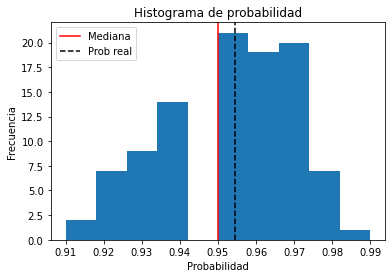

Con n1 = 50.0 y n2 = 100.0


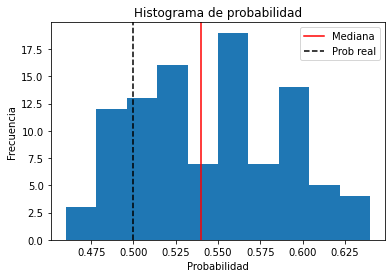

Con n1 = 48.0 y n2 = 49.0


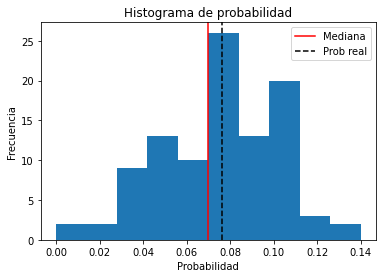

-------------------------------------------------
Para n =  500
Con n1 = 200.0 y n2 = 300.0


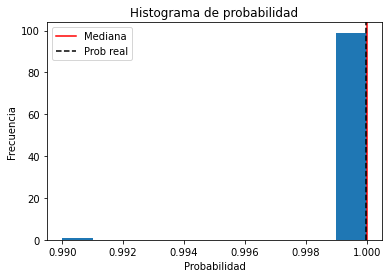

Con n1 = 250.0 y n2 = 500.0


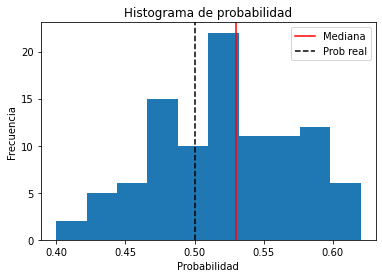

Con n1 = 240.0 y n2 = 245.0


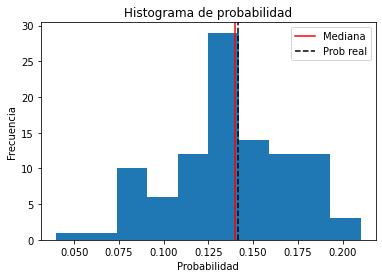

-------------------------------------------------
Para n =  1000
Con n1 = 400.0 y n2 = 600.0


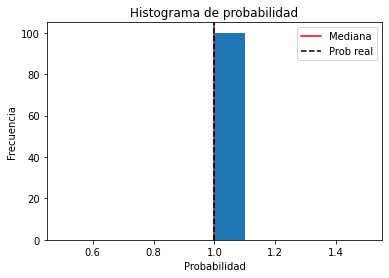

Con n1 = 500.0 y n2 = 1000.0


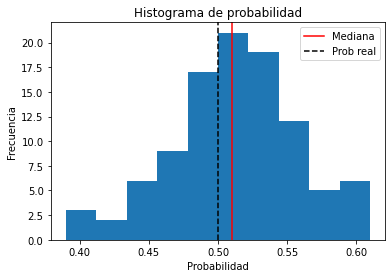

Con n1 = 480.0 y n2 = 490.0


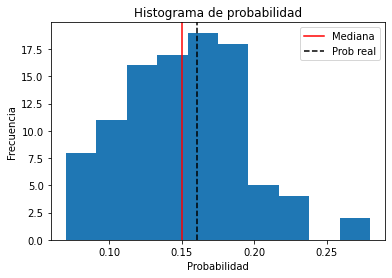

In [12]:
# Grafique el histograma de plot_evaluate para los casos n=100,500,1000 y
# n1,n2=0.4*n,0.6*n, n1,n2=0.5*n,1.*n, n1,n2=0.48*n,0.49*n para 
# cada uno de los n

k = 100
r = 100
n_lista = [100,500,1000]
for n in n_lista:
    print("-------------------------------------------------")
    print("Para n = ",n)
    
    n1,n2 = 0.4*n,0.6*n
    print("Con n1 =",n1,"y n2 =",n2)
    plot_evaluate(n,n1,n2,k,r)
    
    n1,n2 = 0.5*n,1.*n
    print("Con n1 =",n1,"y n2 =",n2)
    plot_evaluate(n,n1,n2,k,r)
    
    n1,n2=0.48*n,0.49*n
    print("Con n1 =",n1,"y n2 =",n2)
    plot_evaluate(n,n1,n2,k,r)


